4.3 tensorflow로 직접구현하는 Logistic Regression
- Linear   Regression : Y=wX+b           #선형 방정식
- Logistic Regression : Y=sigmoid(wX+b)  #선형+비선형 방정식  

In [119]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [120]:
x = [[150, 50], [155, 55], [155, 80], [160, 55], [145, 55]]
y = [[0], [0], [1], [0], [1]]
x_test = [[130,35], [150, 45], [160, 50], [170, 57], [180, 70]]

In [121]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler().fit(x) # x의 최대 최소값을 계산해두고
x = scalar.transform(x) # 정규화한다.
x_test = scalar.transform(x_test)

In [122]:
W = tf.Variable(tf.random_normal(shape=[2]))
b = tf.Variable(tf.random_normal(shape=[1]))
z = tf.reduce_sum(W*x, axis=1, keepdims=True) +b
hypothesis = 1/(1+tf.exp(-z))
cost = tf.reduce_mean(tf.square(hypothesis - y))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 최초에 한번씩 꼭 해줘야 한다.

In [127]:
z_test = tf.reduce_sum(W*x, axis=1, keepdims=True) +b
hypothesis_test = 1/(1+tf.exp(-z_test))

In [128]:
#w와 b가 update됩니다.
for i in range(100):
    sess.run(train)
    if i%10==0 :
        print(sess.run([cost, W]))

[0.3908865, array([-0.26671204, -1.0083485 ], dtype=float32)]
[0.38895094, array([-0.27509674, -1.0056121 ], dtype=float32)]
[0.3870102, array([-0.2834959, -1.0028391], dtype=float32)]
[0.38506475, array([-0.2919079, -1.0000293], dtype=float32)]
[0.38311547, array([-0.30033118, -0.9971827 ], dtype=float32)]
[0.38116306, array([-0.30876416, -0.99429935], dtype=float32)]
[0.3792082, array([-0.31720513, -0.9913791 ], dtype=float32)]
[0.37725157, array([-0.32565245, -0.9884221 ], dtype=float32)]
[0.37529406, array([-0.3341044 , -0.98542845], dtype=float32)]
[0.37333632, array([-0.3425593, -0.9823982], dtype=float32)]


In [129]:
sess.run(hypothesis)

array([[0.7673965 ],
       [0.71375096],
       [0.5243072 ],
       [0.68932134],
       [0.75898415]], dtype=float32)

In [130]:
sess.run(hypothesis_test)

array([[0.7673965 ],
       [0.71375096],
       [0.5243072 ],
       [0.68932134],
       [0.75898415]], dtype=float32)

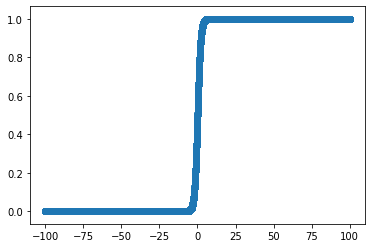

In [131]:
x = np.arange(-100, 100, 0.001)
plt.scatter(x, 1/(1+np.exp(-x)))